In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import PercentFormatter
pd.set_option('display.max_rows', 100)

In [3]:
data = pd.read_excel('Data Dump _ Customer Metrics (make a copy).xlsx', sheet_name = 'Raw CM Data')

In [4]:
data_raw = data.copy()

In [5]:
data.head()

,Customer Success Associate,Parent Restaurant name,Unique Location ID,Highest Product,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,Cancellations Week 2,Cancellations Week 1,Missed Orders Week 2,Missed Orders Week 1,Average Order Week 2,Average Order Value week 1,Last Product Usage Date,Payment Status,Activation Date,Number of online delivery partners
0,Jimmy,Restaurant 747,06dc26c0-9998-4912-b026-dd0e3e8acdff,Order Manager,1,1,47.0,60.0,47.0,60.0,0.0,2.0,0.0,0.0,24.99,22.71,2022-01-15 10:50:00,Active,2021-09-28,2.0
1,Jimmy,Restaurant 432,36677987-7739-492d-a034-f94f22bae72f,Premium,0,0,37.0,46.0,0.0,0.0,2.0,2.0,0.0,0.0,36.19,29.57,2022-01-15 10:07:00,NaN,2020-08-11,3.0
2,Jimmy,Restaurant 747,1955165c-d286-4d09-aed9-27c908c26503,Order Manager,1,1,63.0,66.0,62.0,66.0,1.0,1.0,0.0,0.0,29.43,29.72,2022-01-15 10:53:00,Active,2021-06-16,2.0
3,Jimmy,Restaurant 747,fc15619e-87c6-4326-8f20-e71b8bd55662,Order Manager,1,1,50.0,48.0,50.0,48.0,0.0,2.0,0.0,0.0,31.22,26.58,2022-01-15 10:09:00,Active,2021-06-16,2.0
4,Jimmy,Restaurant 719,ef394528-735d-4307-aebe-034aa5e4966c,Premium + POS,1,0,534.0,565.0,0.0,0.0,2.0,3.0,0.0,0.0,47.72,46.22,2022-01-15 10:59:00,Active,2021-03-22,2.0


In [6]:
data.describe()

,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,Cancellations Week 2,Cancellations Week 1,Missed Orders Week 2,Missed Orders Week 1,Average Order Week 2,Average Order Value week 1,Number of online delivery partners
count,4424.000000,4424.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3622.000000,3716.000000,4220.000000
mean,0.455922,0.698011,123.319451,125.220670,58.980701,58.484256,2.578720,3.091925,0.015490,0.014982,33.481803,32.247239,1.383412
std,0.525928,0.459665,216.125470,211.526847,172.541715,143.952656,5.503551,6.644932,0.170206,0.154614,15.498453,15.321459,0.901874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.510000,23.755000,1.000000
50%,0.000000,1.000000,62.000000,63.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,29.910000,28.925000,2.000000
75%,1.000000,1.000000,157.750000,162.000000,62.750000,61.750000,3.000000,4.000000,0.000000,0.000000,37.497500,36.150000,2.000000
max,4.000000,2.000000,6938.000000,6409.000000,6907.000000,3276.000000,141.000000,166.000000,7.000000,5.000000,250.910000,306.610000,5.000000


In [7]:
data.dtypes

Customer Success Associate                    object
Parent Restaurant name                        object
Unique Location ID                            object
Highest Product                               object
# Printers                                     int64
# Tablets                                      int64
Orders Week 2                                float64
Orders Week 1                                float64
Printed Orders Week 2                        float64
Printed Orders Week 1                        float64
Cancellations Week 2                         float64
Cancellations Week 1                         float64
Missed Orders Week 2                         float64
Missed Orders Week 1                         float64
Average Order Week 2                         float64
Average Order Value week 1                   float64
Last Product Usage Date               datetime64[ns]
Payment Status                                object
Activation Date                       datetime

In [8]:
data.isnull().sum()

Customer Success Associate              0
Parent Restaurant name                  0
Unique Location ID                      7
Highest Product                       113
# Printers                              0
# Tablets                               0
Orders Week 2                         486
Orders Week 1                         486
Printed Orders Week 2                 486
Printed Orders Week 1                 486
Cancellations Week 2                  486
Cancellations Week 1                  486
Missed Orders Week 2                  486
Missed Orders Week 1                  486
Average Order Week 2                  802
Average Order Value week 1            708
Last Product Usage Date               786
Payment Status                        778
Activation Date                        24
Number of online delivery partners    204
dtype: int64

In [9]:
pd.DataFrame(data.groupby('Unique Location ID')['Parent Restaurant name'].count().sort_values(ascending=False))

,Parent Restaurant name
Unique Location ID,
f0029277-0e7e-410a-ad4e-5247b892a280,3
e1968e6a-ddd0-4d95-92d6-f5efc5e31e70,2
d9d1a34e-6bf6-4f51-9358-b23e1f2002d2,2
43aae2c5-0a69-4351-91a1-7f009bc3765d,2
23a76176-5ff7-4bac-9af8-fed88b1aa937,2
...,...
a806c655-7adc-45d7-b8a2-8aeb3f618df6,1
a80186ac-4ac3-46f4-be25-09105db36916,1
a7e773fa-75f6-427b-b8fa-2610ffab0f80,1


In [10]:
data[data['Unique Location ID'] == '43aae2c5-0a69-4351-91a1-7f009bc3765d']

,Customer Success Associate,Parent Restaurant name,Unique Location ID,Highest Product,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,Cancellations Week 2,Cancellations Week 1,Missed Orders Week 2,Missed Orders Week 1,Average Order Week 2,Average Order Value week 1,Last Product Usage Date,Payment Status,Activation Date,Number of online delivery partners
3872,Rupert,Restaurant 958,43aae2c5-0a69-4351-91a1-7f009bc3765d,POS Integration,1,1,142.0,153.0,141.0,151.0,4.0,6.0,0.0,0.0,39.81,36.8,2022-01-15 10:58:00,Active,2021-05-19,3.0
3875,Rupert,Restaurant 958,43aae2c5-0a69-4351-91a1-7f009bc3765d,Order Manager,0,1,142.0,153.0,141.0,151.0,4.0,6.0,0.0,0.0,39.81,36.8,2022-01-15 10:58:00,Active,2021-08-05,3.0


One unique location ID should correspond to one parent restaurant. Since the actication dates are different, the current assumption for the above result is that, the same location may have experienced a change in store owners, so this has led to a change in the parent store. If the current assumption is not hold, further data investigation may be needed.

## Missing Value

In [11]:
class profiling:
    
    def histplt (val: list,bins: int,title: str,xlabl: str,ylabl: str,xlimt: list,
                 ylimt: list=False, loc: int =1,legend: int=1,axt=None,days: int=False,
                 class_: int=False,scale: int=1,x_tick: list=False, calc_perc: bool= True,
                 nsplit: int=1,font: int=5,color: str='b') -> [float] :
        
        """ Histogram including important statistics """
        
        ax1 = axt or plt.axes()
        font = {'size'   : font }
        plt.rc('font', **font) 
        
        miss_n = len(val[np.isnan(val)])
        tot = len(val)
        n_distinct = len(np.unique(val))
        miss_p = (len(val[np.isnan(val)])/tot)*100
        val = val[~np.isnan(val)]        
        val = np.array(val)
        plt.hist(val, bins=bins, weights=np.ones(len(val)) / len(val),ec='black',color=color)
        n_nonmis = len(val[~np.isnan(val)])
        if class_: 
            times = 100
        else:
            times = 1 
        Mean = np.nanmean(val)*times
        Median = np.nanmedian(val)*times
        sd = np.sqrt(np.nanvar(val))
        Max = np.nanmax(val)
        Min = np.nanmin(val)
        p1 = np.quantile(val, 0.01)
        p25 = np.quantile(val, 0.25)
        p75 = np.quantile(val, 0.75)
        p99 = np.quantile(val, 0.99)
        
        if calc_perc == True:
            txt = 'n (not missing)=%.0f\nn_distinct=%.0f\nMissing=%.1f%%\nMean=%0.2f\nσ=%0.1f\np1%%=%0.1f\np99%%=%0.1f\nMin=%0.1f\nMax=%0.1f'       
            anchored_text = AnchoredText(txt %(n_nonmis,n_distinct,miss_p,Mean,sd,p1,p99,Min,Max), borderpad=0, 
                                         loc=loc,prop={ 'size': font['size']*scale})    
        else:
            txt = 'n (not missing)=%.0f\nn_distinct=%.0f\nMissing=%.1f%%\nMean=%0.2f\nσ=%0.1f\nMin=%0.1f\nMax=%0.1f'       
            anchored_text = AnchoredText(txt %(n_nonmis,n_distinct,miss_p,Mean,sd,Min,Max), borderpad=0, 
                                         loc=loc,prop={ 'size': font['size']*scale})                
            
        if(legend==1): ax1.add_artist(anchored_text)
        if (scale): plt.title(title,fontsize=font['size']*(scale+0.15))
        else:       plt.title(title)
        plt.xlabel(xlabl,fontsize=font['size']) 
        ax1.set_ylabel('Frequency',fontsize=font['size'])
        if (scale): ax1.set_xlabel(xlabl,fontsize=font['size']*scale)
        else:       ax1.set_xlabel(xlabl)
        try:
            xlabl
        except NameError:
            pass    
        else:
            if (scale): plt.xlabel(xlabl,fontsize=font['size']*scale) 
            else:        plt.xlabel(xlabl)   
        try:
            ylabl
        except NameError:
            pass      
        else:
            if (scale): plt.ylabel(ylabl,fontsize=font['size']*scale)  
            else:         plt.ylabel(ylabl)  
            
        if (class_==True): plt.xticks([0,1])
        plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
        ax1.grid(linewidth='0.1')
        try:
            xlimt
        except NameError:
            pass  
        else:
            plt.xlim(xlimt) 
        try:
            ylimt
        except NameError:
            pass  
        else:
            plt.ylim(ylimt)  
            
        if x_tick: plt.xticks(x_tick,fontsize=font['size']*scale)    
        plt.yticks(fontsize=font['size']*scale)  
        plt.grid(linewidth='0.12')
        
        # Interquartile Range Method for outlier detection
        iqr = p75 - p25
        
        # calculate the outlier cutoff
        cut_off = np.array(iqr) * 1.5
        lower, upper = p25 - cut_off, p75 + cut_off        
                
        
        return tot, n_nonmis, n_distinct, miss_n, miss_p, Mean, Median, sd, Max, Min, p1, p25, p75, p99, sd
    
##############################################################################        
        
    def bargraph(val_ob: [list],  title: str, ylabel: str, titlefontsize: int=10, xfontsize: int=5,scale: int=1, 
                 yfontsize: int=8, select: bool= False, fontsizelable: bool= False, xshift: float=-0.1, nsim: int=False
                 ,yshift: float=0.01,percent: bool=False, xlim: list=False, axt: bool=None, color: str='b',sort=True,
                 ylim: list=False, y_rot: int=0, ytick_rot: int=90, graph_float: int=1, loc: int =1,legend: int=1) -> None:
        
        """ vertical bargraph """
        
        ax1 = axt or plt.axes()

        tot = len(val_ob)
        miss_p_ob = (len(val_ob[pd.isnull(val_ob)])/tot)*100        
        n_nonmis_ob = len(val_ob[~pd.isnull(val_ob)])    
        con = np.array(val_ob.value_counts())
        len_ = len(con)
        if len_ > 10: len_ = 10
        cats = list(val_ob.value_counts().keys())
        val_ob = con[:len_]
        clmns = cats[:len_]
        # Sort counts
        if sort:
            sort_score = sorted(zip(val_ob,clmns), reverse=True)
            Clmns_sort = [sort_score[i][1] for i in range(len(clmns))]
            sort_score = [sort_score[i][0] for i in range(len(clmns))]              
        else:
            Clmns_sort = clmns
            sort_score = val_ob
        index1 = np.arange(len(clmns))
        if (select):
            Clmns_sort=Clmns_sort[:select]
            sort_score=sort_score[:select]
        ax1.bar(Clmns_sort, sort_score, width=0.6, align='center', alpha=1, edgecolor='k', capsize=4,color=color)
        plt.title(title,fontsize=titlefontsize)
        ax1.set_ylabel(ylabel,fontsize=yfontsize)
        ax1.set_xticks(np.arange(len(Clmns_sort)))
        
        ax1.set_xticklabels(Clmns_sort,fontsize=xfontsize, rotation=ytick_rot,y=0.02)   
        if (percent): plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
        ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.2) 
        if (xlim): plt.xlim(xlim)
        if (ylim): plt.ylim(ylim)
        if (fontsizelable):
            for ii in range(len(sort_score)):
                if (percent):
                    plt.text(xshift+ii, sort_score[ii]+yshift,f'{"{0:.2f}".format(sort_score[ii]*100)}%',
                    fontsize=fontsizelable,rotation=y_rot,color='k')     
                else:
                    plt.text(xshift+ii, sort_score[ii]+yshift,f'{np.round(sort_score[ii],graph_float)}',
                        fontsize=fontsizelable,rotation=y_rot,color='k')                                 
        dic_Clmns = {}
        for i in range(len(Clmns_sort)):
            dic_Clmns[Clmns_sort[i]]=sort_score[i]
            
        txt = 'n (not missing)=%.0f\nMissing=%.1f%%'       
        anchored_text = AnchoredText(txt %(n_nonmis_ob,miss_p_ob), borderpad=0, 
                                     loc=loc,prop={ 'size': font['size']})    
        if(legend==1): ax1.add_artist(anchored_text) 
        
###############################################################

    def bargraph_hor(val: [float], clmns: [str], title: str, ylabel: str, titlefontsize: int=10, xfontsize: int=5,scale: int=1, 
                 yfontsize: int=8, select: bool= False, fontsizelable: bool= False, xshift: float=-0.1, nsim: int=False
                 ,yshift: float=0.01,percent: bool=False, xlim: list=False, axt: bool=None, color: str='b',reverse: bool=False,
                 ylim: list=False, x_rot: int=0, graph_float: int=1, loc: int =1,legend: int=1) -> None:
        
        """ horizontal bargraph """
        
        ax1 = axt or plt.axes() 
        
        # Sort counts
        sort_score = sorted(zip(val,clmns), reverse=reverse)
        Clmns_sort = [sort_score[i][1] for i in range(len(clmns))]
        sort_score = [sort_score[i][0] for i in range(len(clmns))]              
        index1 = np.arange(len(clmns))
        if (select):
            Clmns_sort=Clmns_sort[:select]
            sort_score=sort_score[:select]
        ax1.barh(Clmns_sort, sort_score, align='center', height=0.6,lw = 2, edgecolor='black',color=color)
        plt.title(title,fontsize=titlefontsize)
        ax1.set_yticks(np.arange(len(Clmns_sort)))
        
        ax1.set_yticklabels(Clmns_sort,fontsize=yfontsize, rotation=0,y=0.02)   
        if (percent): plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
        ax1.grid(color='k', linestyle='--', linewidth=0.1) 
        if (xlim): plt.xlim(xlim)
        if (ylim): plt.ylim(ylim)
        if (fontsizelable):
            for ii in range(len(sort_score)):
                if (percent):
                    plt.text(sort_score[ii]+xshift, yshift+ii,f'{"{0:.2f}".format(sort_score[ii]*100)}%',
                    fontsize=fontsizelable,rotation=x_rot,color='k')     
                else:
                    plt.text(sort_score[ii]+xshift, yshift+ii,f'{np.round(sort_score[ii],graph_float)}',
                        fontsize=fontsizelable,rotation=x_rot,color='k')  

In [12]:
data.columns.to_list()

['Customer Success Associate',
 'Parent Restaurant name',
 'Unique Location ID',
 'Highest Product',
 '# Printers',
 '# Tablets',
 'Orders Week 2',
 'Orders Week 1',
 'Printed Orders Week 2',
 'Printed Orders Week 1',
 'Cancellations Week 2',
 'Cancellations Week 1',
 'Missed Orders Week 2',
 'Missed Orders Week 1',
 'Average Order Week 2',
 'Average Order Value week 1',
 'Last Product Usage Date',
 'Payment Status',
 'Activation Date',
 'Number of online delivery partners']

In [13]:
# correct  dtypes in Pandas DataFrame

feat_num = []
feat_obj = []
for iclm in data.columns.to_list():
    if  data[iclm].dtypes=='<M8[ns]':
        data[iclm] = [int(i.strftime('%y%j')) if pd.notna(i) else None for i in data[iclm]]# convert date to Julian date
        feat_num.append(iclm)
    else:
        try:
            pd.to_numeric(data[iclm])
            feat_num.append(iclm)
        except (ValueError, TypeError):
            feat_obj.append(iclm)
        
data[feat_num] = data[feat_num].astype(float)  
clmns = list(data.columns)

In [361]:
df_score[feat_num]

,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,Cancellations Week 2,Cancellations Week 1,Missed Orders Week 2,Missed Orders Week 1,Average Order Week 2,Average Order Value week 1,Last Product Usage Date,Activation Date,Number of online delivery partners,Highest Product_num,Highest Product_num,Highest Product_num,Highest Product_num
0,1.0,1.0,47.0,60.0,47.0,60.0,0.0,2.0,0.0,0.0,24.99,22.71,22015.0,21271.0,2.0,2.0,2.0,2.0,2.0
1,0.0,0.0,37.0,46.0,0.0,0.0,2.0,2.0,0.0,0.0,36.19,29.57,22015.0,20224.0,3.0,3.0,3.0,3.0,3.0
2,1.0,1.0,63.0,66.0,62.0,66.0,1.0,1.0,0.0,0.0,29.43,29.72,22015.0,21167.0,2.0,2.0,2.0,2.0,2.0
3,1.0,1.0,50.0,48.0,50.0,48.0,0.0,2.0,0.0,0.0,31.22,26.58,22015.0,21167.0,2.0,2.0,2.0,2.0,2.0
4,1.0,0.0,534.0,565.0,0.0,0.0,2.0,3.0,0.0,0.0,47.72,46.22,22015.0,21081.0,2.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,0.0,22.0,36.0,21.0,24.0,0.0,0.0,0.0,0.0,19.59,17.31,0.0,21043.0,2.0,2.0,2.0,2.0,2.0
4420,1.0,0.0,80.0,81.0,80.0,80.0,0.0,1.0,0.0,0.0,25.24,22.59,22015.0,21013.0,2.0,2.0,2.0,2.0,2.0
4421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.09,0.00,21234.0,20337.0,0.0,2.0,2.0,2.0,2.0
4422,1.0,0.0,90.0,107.0,90.0,107.0,2.0,1.0,0.0,0.0,30.53,29.45,22015.0,20329.0,3.0,2.0,2.0,2.0,2.0


In [14]:
val_lis = ['# Printers', '# Tablets',
       'Orders Week 2', 'Orders Week 1', 'Printed Orders Week 2',
       'Printed Orders Week 1', 'Cancellations Week 2', 'Cancellations Week 1',
       'Missed Orders Week 2', 'Missed Orders Week 1', 'Average Order Week 2',
       'Average Order Value week 1','Number of online delivery partners']

<ipython-input-15-540950821655>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(2,5,in_+1)


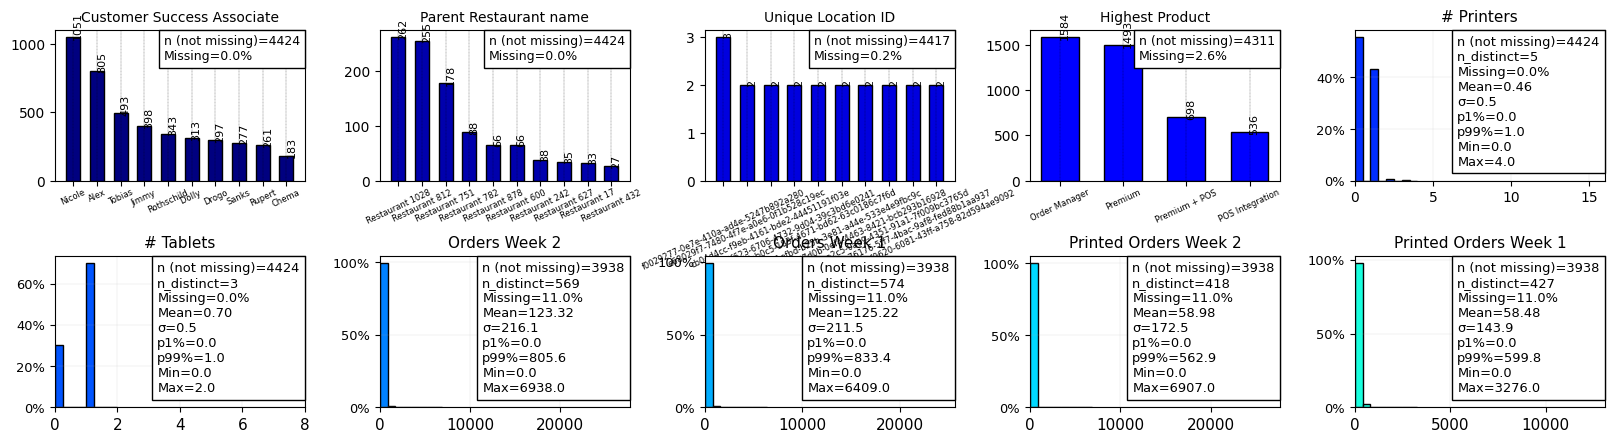

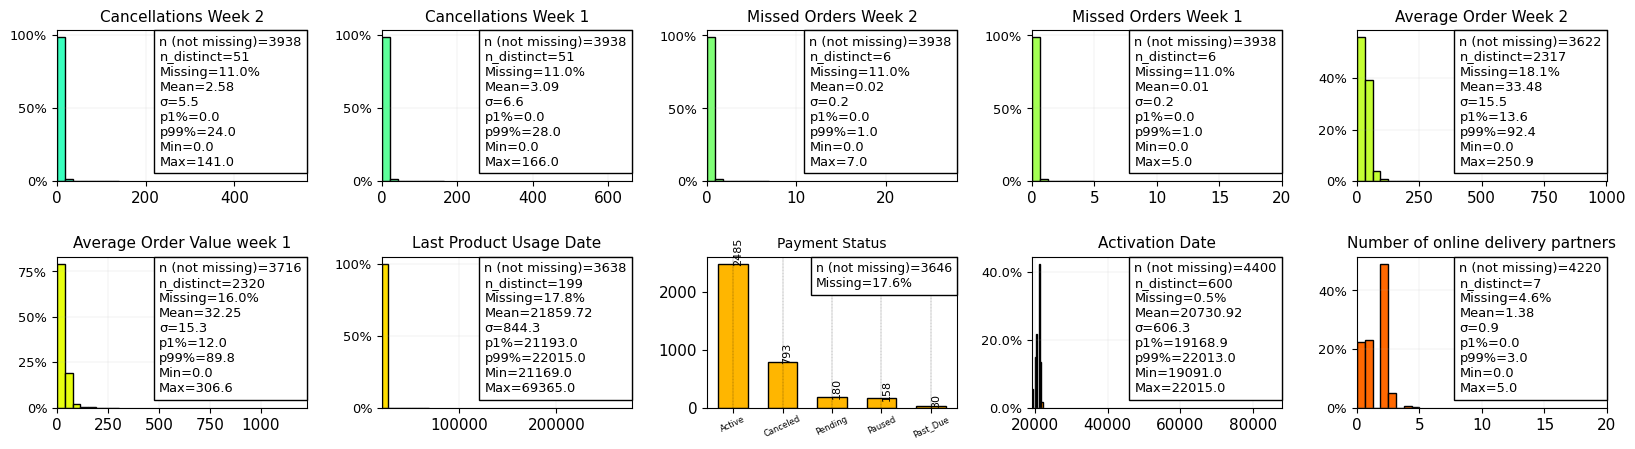

In [15]:
font = {'size': 9}
plt.rc('font', **font)
colors_map = plt.colormaps.get_cmap('jet')
colors = colors_map(np.linspace(0,0.8,len(data.columns)))
#
miss_n = [None]*len(feat_num)
miss_p = [None]*len(feat_num)
p1 = [None]*len(feat_num)
p99 = [None]*len(feat_num)
sd_num = [None]*len(feat_num)
#      
nfig1 = np.arange(0, len(data.columns),10)
nfig2 = np.arange(10, len(data.columns)+10,10)
ino = 0
num_count = 0
for ig in zip(nfig1, nfig2):
    in_ = 0
    fig, ax = plt.subplots(figsize=(20, 5), dpi= 100, facecolor='w', edgecolor='k') 
    for ir in range(ig[0],ig[1]):
        if ir < len(data.columns):
            ax1 = plt.subplot(2,5,in_+1) 
            if data.columns[ir] in feat_num:
                val = data[data.columns[ir]]
                _,_,_, miss_n[num_count], miss_p[num_count],_ ,_ ,_ ,_ ,_ ,\
                p1[num_count],_ ,_ ,p99[num_count] ,sd_num[num_count] = profiling.histplt (val,bins=8,title=f'{data.columns[ir]}',xlabl=None,days=False,
                                  ylabl=None,xlimt=(np.nanmin(val),np.nanmax(val)*4),ylimt=False
                                  ,axt=ax1,nsplit=5,scale=0.85,font=11,loc=1,color=colors[ir])
                num_count += 1
                
            elif data.columns[ir] in feat_obj:
                val_obj = data[data.columns[ir]]
                profiling.bargraph (val_obj, title=f'{data.columns[ir]}', ylabel='',titlefontsize=10, xfontsize=6,
                          yfontsize=7,percent=False,fontsizelable=8,xshift=0,color=colors[ir],legend=True,ytick_rot=25, y_rot=90, axt=ax1)                
                            
            in_ += 1
    ino += 1
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.3)
    
    plt.show()

In [16]:
## Will directly drop data with null Location ID since we are exploring clients' info
data = data.dropna(subset=['Unique Location ID'])
data.shape

(4417, 20)

In [17]:
data.isnull().sum()

Customer Success Associate              0
Parent Restaurant name                  0
Unique Location ID                      0
Highest Product                       108
# Printers                              0
# Tablets                               0
Orders Week 2                         479
Orders Week 1                         479
Printed Orders Week 2                 479
Printed Orders Week 1                 479
Cancellations Week 2                  479
Cancellations Week 1                  479
Missed Orders Week 2                  479
Missed Orders Week 1                  479
Average Order Week 2                  795
Average Order Value week 1            701
Last Product Usage Date               779
Payment Status                        776
Activation Date                        23
Number of online delivery partners    197
dtype: int64

<ipython-input-18-27f3ff43c24d>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,2)


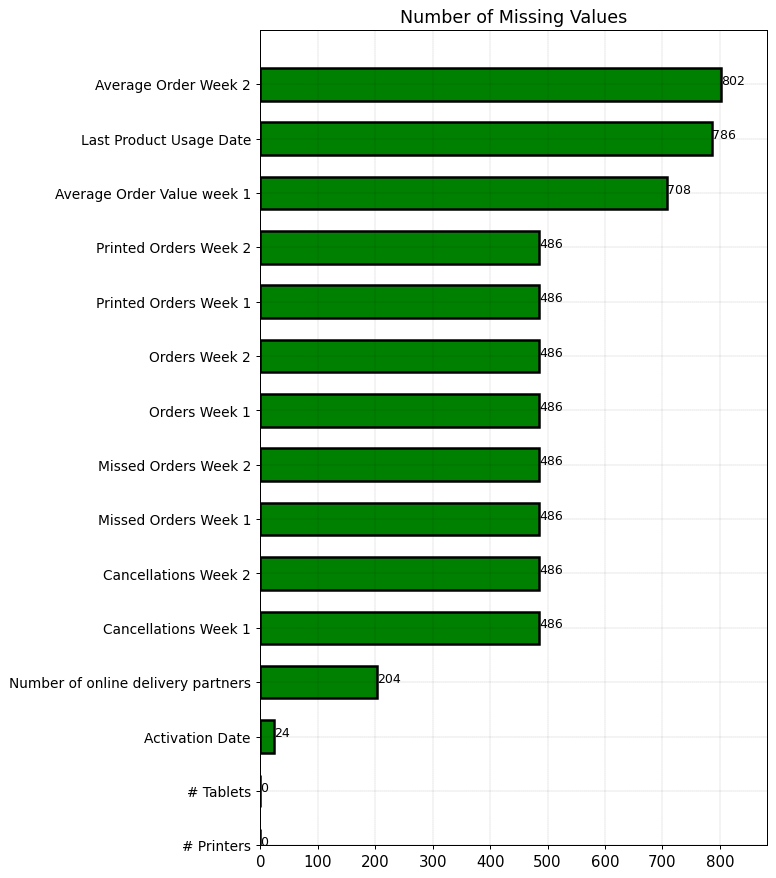

In [18]:
font = {'size'   : 12}
plt.rc('font', **font)
fig ,ax = plt.subplots(figsize=(16,12), dpi= 90, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2,2) 
val = miss_n
profiling.bargraph_hor (val,feat_num, title=f'Number of Missing Values', ylabel='Numbers',titlefontsize=14, 
              xfontsize=6, yfontsize=11,percent=False,fontsizelable=10,xshift=0,color='g',
              yshift=0,ylim=[0,len(feat_num)], xlim=[-1,max(val)*1.1], x_rot=0, axt=ax1)
plt.show()

<ipython-input-19-c926e398515e>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,2)


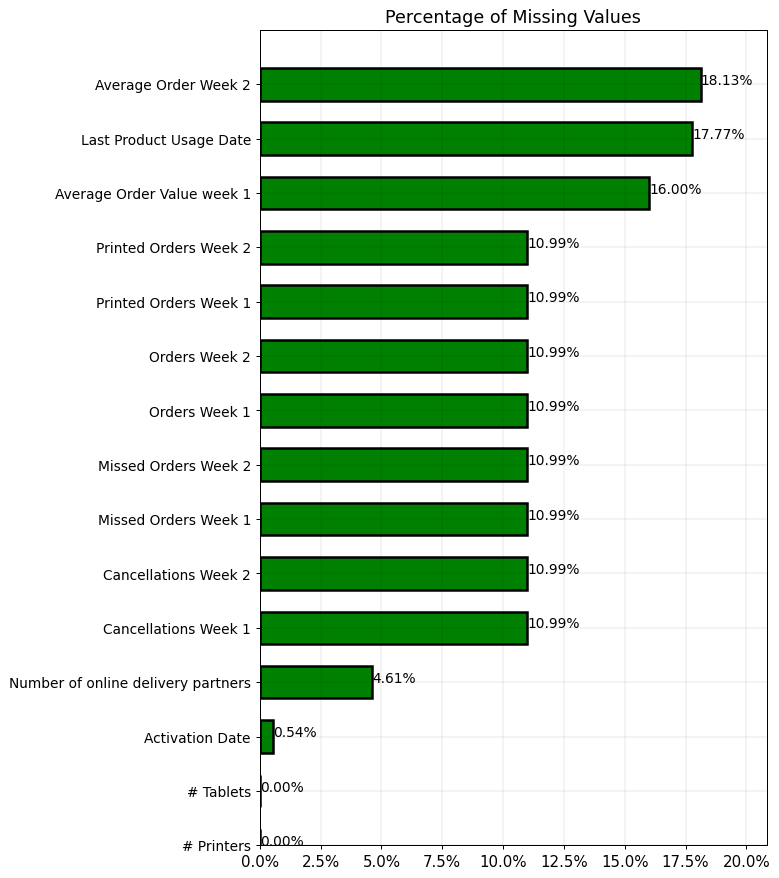

In [19]:
font = {'size'   : 12}
plt.rc('font', **font)
fig ,ax = plt.subplots(figsize=(16,12), dpi= 90, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2,2) 
val = [i/100 for i in miss_p]
profiling.bargraph_hor (val,feat_num, title=f'Percentage of Missing Values', ylabel='Numbers',titlefontsize=14,
              xfontsize=6, yfontsize=11,percent=True,fontsizelable=11,xshift=0,color='g',
              yshift=0,ylim=[0,len(feat_num)], xlim=[0,max(val)*1.15], x_rot=0, axt=ax1)
plt.show()

In [288]:
#null_counts = data.isnull().sum(axis=1)
#threshold = 5
#df = data[null_counts < threshold]
#df.describe() #Exclude some clients with too many unknown data

In [289]:
df = data.copy()

In [290]:
#data[null_counts >= 5].head()

In [292]:
df.isnull().sum()

Customer Success Associate              0
Parent Restaurant name                  0
Unique Location ID                      0
Highest Product                       108
# Printers                              0
# Tablets                               0
Orders Week 2                         479
Orders Week 1                         479
Printed Orders Week 2                 479
Printed Orders Week 1                 479
Cancellations Week 2                  479
Cancellations Week 1                  479
Missed Orders Week 2                  479
Missed Orders Week 1                  479
Average Order Week 2                  795
Average Order Value week 1            701
Last Product Usage Date               779
Payment Status                        776
Activation Date                        23
Number of online delivery partners    197
dtype: int64

In [293]:
df.dtypes

Customer Success Associate             object
Parent Restaurant name                 object
Unique Location ID                     object
Highest Product                        object
# Printers                            float64
# Tablets                             float64
Orders Week 2                         float64
Orders Week 1                         float64
Printed Orders Week 2                 float64
Printed Orders Week 1                 float64
Cancellations Week 2                  float64
Cancellations Week 1                  float64
Missed Orders Week 2                  float64
Missed Orders Week 1                  float64
Average Order Week 2                  float64
Average Order Value week 1            float64
Last Product Usage Date               float64
Payment Status                         object
Activation Date                       float64
Number of online delivery partners    float64
dtype: object

In [294]:
#df1 = df.groupby(['Unique Location ID'],as_index=False).agg(lambda x : x.sum() if x.dtype=='float64' else ' '.join(x))
#df1.describe()

In [295]:
df['Highest Product'].unique()

array(['Order Manager', 'Premium', 'Premium + POS', 'POS Integration',
       nan], dtype=object)

In [296]:
df['Highest Product_num'] = df['Highest Product'].replace({'Unknown': 0, 'POS Integration': 1, 'Order Manager': 2, 'Premium': 3, 'Premium + POS': 4})
df['Highest Product_num']  = df['Highest Product_num'].astype(float)  
##Assumtion: level of products will affect health scores

In [297]:
df = df.fillna(({'Highest Product':'Unknown', 'Payment Status':'Unknown', 
                 'Parent Restaurant name':'Unknown', 'Customer Success Associate':'Unknown'}))


# Plots

> Include null values

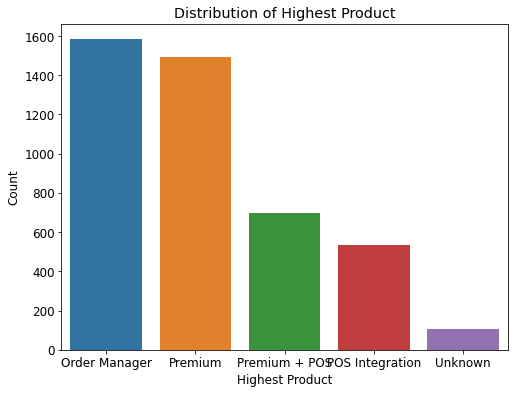

In [298]:
# Plot a bar chart of the number of customers for each product category
plt.figure(figsize=(8, 6))
sns.countplot(x='Highest Product', data=df)
plt.title('Distribution of Highest Product')
plt.xlabel('Highest Product')
plt.ylabel('Count')
plt.show()




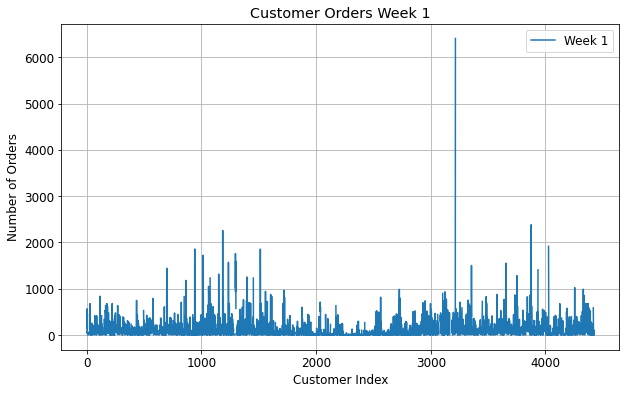

6409.0


In [299]:
# Line plot: Orders Week 1 and Week 2
plt.figure(figsize=(10, 6))
plt.plot(df['Orders Week 1'], label='Week 1')
#plt.plot(data['Orders Week 2'], label='Week 2')
plt.title('Customer Orders Week 1')
plt.xlabel('Customer Index')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid()
plt.show()

print(data['Orders Week 1'].max())

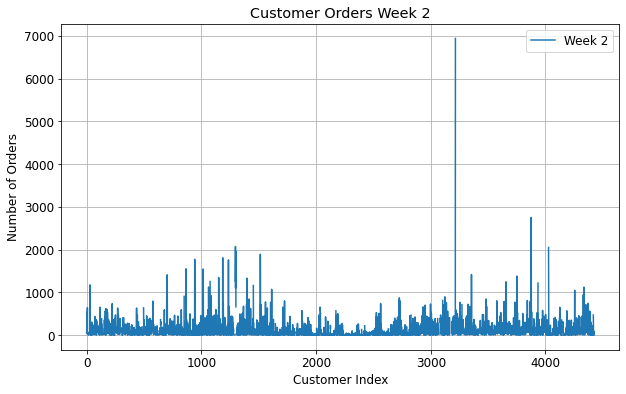

6938.0


In [300]:
# Line plot: Orders Week 1 and Week 2
plt.figure(figsize=(10, 6))
#plt.plot(data['Orders Week 1'], label='Week 1')
plt.plot(df['Orders Week 2'], label='Week 2')
plt.title('Customer Orders Week 2')
plt.xlabel('Customer Index')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid()
plt.show()

print(data['Orders Week 2'].max())

In [301]:
print(df['Orders Week 1'].index[df['Orders Week 1'] == df['Orders Week 1'].max()])
print(df['Orders Week 2'].index[df['Orders Week 2'] == df['Orders Week 2'].max()])

Int64Index([3215], dtype='int64')
Int64Index([3215], dtype='int64')


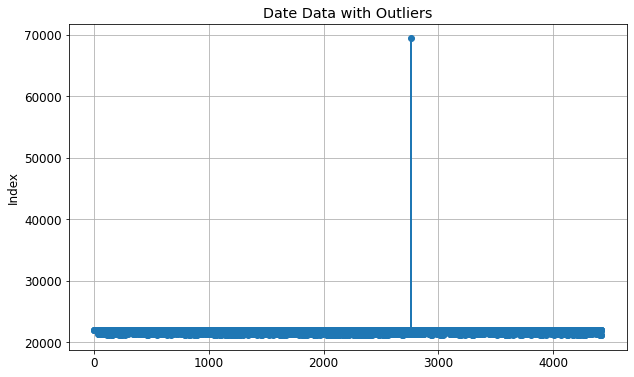

In [302]:
plt.figure(figsize=(10, 6))
plt.plot(df['Last Product Usage Date'],  marker='o', linestyle='-')
plt.ylabel('Last Product Usage Date')
plt.ylabel('Index')
plt.title('Date Data with Outliers')
plt.grid(True)

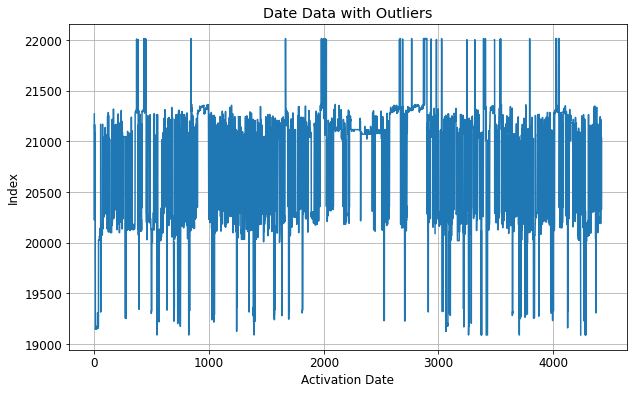

In [303]:
plt.figure(figsize=(10, 6))
plt.plot(df['Activation Date'], linestyle='-')
plt.xlabel('Activation Date')
plt.ylabel('Index')
plt.title('Date Data with Outliers')
plt.grid(True)

In [304]:
feat_num.append('Highest Product_num')

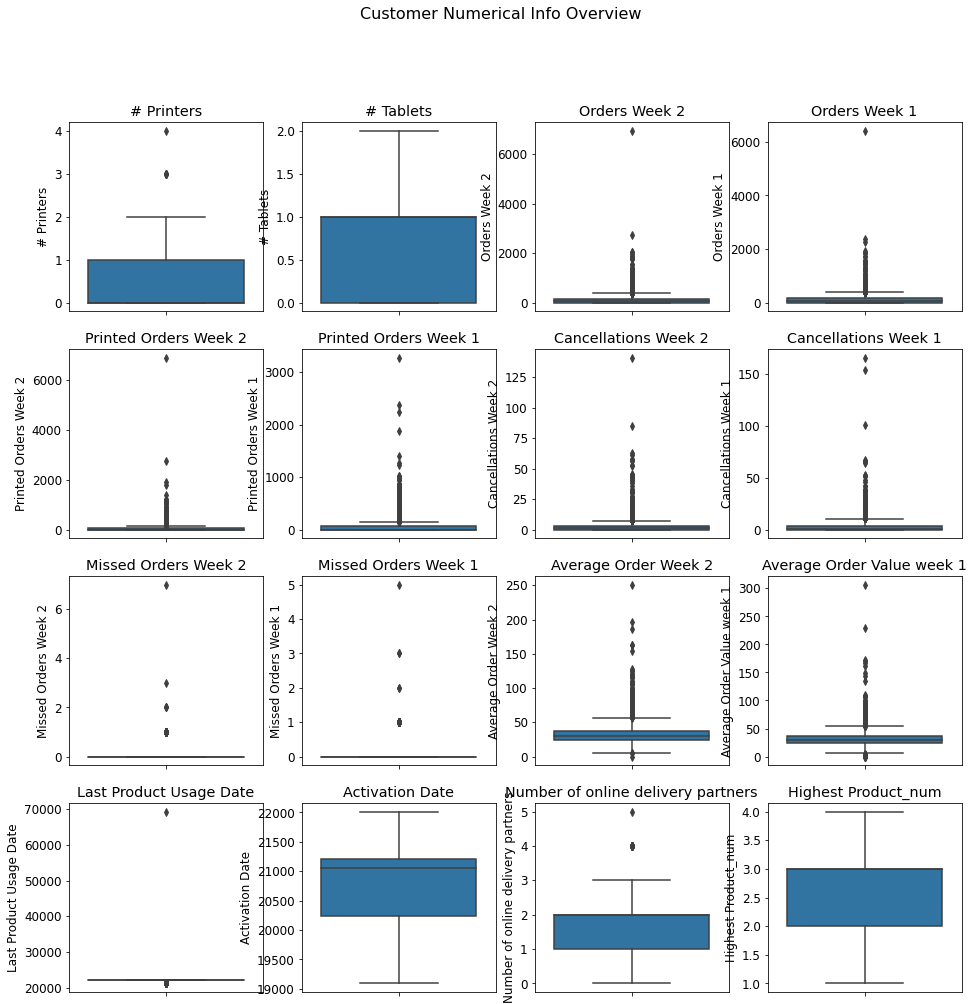

In [305]:
# Box plot: Average Order Week 2

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for m in range(4):
    for n in range(4):
        if (4*m + n) < len(feat_num):
            sns.boxplot(y=feat_num[4*m + n], data=df, ax=axes[m, n])
            axes[m, n].set_title(feat_num[4*m + n])

# Adjust layout and add a title to the combined plot

        
#plt.tight_layout()
plt.suptitle('Customer Numerical Info Overview', fontsize=16)

# Display the combined plot
plt.show()


In [306]:
### Deal with one abnormal product usage date

df1 = df.copy()
use_ind = df1['Last Product Usage Date'].index[df1['Last Product Usage Date'] == df1['Last Product Usage Date'].max()]
df1.loc[use_ind, 'Last Product Usage Date'] = None
df1.loc[use_ind]


,Customer Success Associate,Parent Restaurant name,Unique Location ID,Highest Product,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,...,Cancellations Week 1,Missed Orders Week 2,Missed Orders Week 1,Average Order Week 2,Average Order Value week 1,Last Product Usage Date,Payment Status,Activation Date,Number of online delivery partners,Highest Product_num
2762,Tobias,Restaurant 782,3048b203-dfb9-4a12-aabc-8dc1b5044395,Order Manager,0.0,0.0,103.0,126.0,0.0,0.0,...,1.0,0.0,0.0,41.99,34.53,NaN,Active,21307.0,1.0,2.0


In [307]:
df1 = df.fillna(0)

In [343]:
ind1 = (df1['Average Order Value week 1'].index[df1['Average Order Value week 1'] == df1['Average Order Value week 1'].max()])
print(df1['Average Order Week 2'].index[df1['Average Order Week 2'] == df1['Average Order Week 2'].max()])

Int64Index([2059], dtype='int64')


In [359]:
df1['Unique Location ID'][df1['Average Order Value week 1'] == df1['Average Order Value week 1'].max()].values[0]

'd671f094-7bd8-4b05-ae73-0394f5c6a3e7'

In [309]:
print(df1['Printed Orders Week 1'].index[df1['Printed Orders Week 1'] == df1['Printed Orders Week 1'].max()])
print(df1['Printed Orders Week 2'].index[df1['Printed Orders Week 2'] == df1['Printed Orders Week 2'].max()])

Int64Index([3215], dtype='int64')
Int64Index([3215], dtype='int64')


In [310]:
print(df1['Missed Orders Week 1'].index[df1['Missed Orders Week 1'] == df1['Missed Orders Week 1'].max()])
print(df1['Missed Orders Week 2'].index[df1['Missed Orders Week 2'] == df1['Missed Orders Week 2'].max()])

Int64Index([3190], dtype='int64')
Int64Index([3780], dtype='int64')


In [311]:
print(df1['Cancellations Week 1'].index[df1['Cancellations Week 1'] == df1['Cancellations Week 1'].max()])
print(df1['Cancellations Week 2'].index[df1['Cancellations Week 2'] == df1['Cancellations Week 2'].max()])

Int64Index([1720], dtype='int64')
Int64Index([3215], dtype='int64')


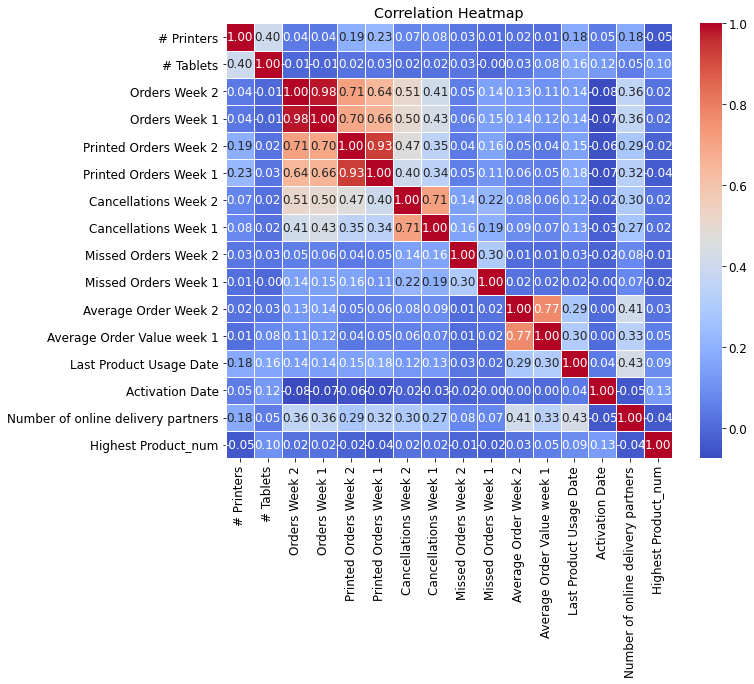

In [312]:
correlation_matrix = df1.corr()

# Create the correlation heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Part 1 Health Scores

In [313]:
df1.columns

Index(['Customer Success Associate', 'Parent Restaurant name',
       'Unique Location ID', 'Highest Product', '# Printers', '# Tablets',
       'Orders Week 2', 'Orders Week 1', 'Printed Orders Week 2',
       'Printed Orders Week 1', 'Cancellations Week 2', 'Cancellations Week 1',
       'Missed Orders Week 2', 'Missed Orders Week 1', 'Average Order Week 2',
       'Average Order Value week 1', 'Last Product Usage Date',
       'Payment Status', 'Activation Date',
       'Number of online delivery partners', 'Highest Product_num'],
      dtype='object')

In [314]:
## Today's date in Juliant format
today_j = int((pd.Timestamp.now()).strftime('%y%j'))
today_j

23220

> Create some columns useful for calculating health scores

In [315]:
df1.loc[:, 'Total_Value_Week1'] = df1['Orders Week 1'] * df1['Average Order Value week 1']
df1.loc[:, 'Total_Value_Week2'] = df1['Orders Week 2'] * df1['Average Order Week 2']
df1.loc[:, 'Activation_Date_Diff'] = today_j - df1['Activation Date'] #longer the better, but not signif

In [316]:
def normalize(arr,t_min, t_max):
    norm_arr = []
    clip_min = np.percentile(arr, 1)
    clip_max = np.percentile(arr, 99)
    diff = t_max - t_min
    diff_arr = clip_max - clip_min   

    for i in arr:
        temp = (((i - clip_min)*diff)/ diff_arr) + t_min
        temp = min(temp, 1)
        norm_arr.append(temp)
        
    return norm_arr



In [317]:
for i in ['Total_Value_Week1', 'Total_Value_Week2', 'Activation_Date_Diff', 'Highest Product_num']:
    df1.loc[:,i+'_norm'] = normalize(df1[i],0,1)

> Weights can be adjusted by cases. Here is just an example.

In [318]:
import pandas as pd


# Function to calculate the customer health score
def calculate_health_score(row):
    # Define weights for different factors (adjust as per business needs)
    weights = {
        'Order Discrepancy': - 10,
        'Cancellation Rate': - 5,
        'Missed Orders Rate': - 5,
        
        'Payment Status Score': 25,
        'Order Value Score': 25,
        'Activation Date Score': 5,
        'Product Usage Score': 15,
        'Printer and Tablet Score': 10,
        'Delivery Partner Score': 10,
        'Highest Product Score': 10
    } # weights in percentage
    
    
    # order fulfillment and operational efficiency: 
    # significant discrepancy b/w ttl oders and printed orders could be a red flag
    # Cancellation may indicates dissatisfaction, and missed oders may indicates low operational efficiency 
    # It may signify that the restaurant is facing challenges in fulfilling customer orders or managing their operational processes effectively
    
    total_orders = row['Orders Week 1'] + row['Orders Week 2']
    
    if total_orders != 0:
        order_disc_rate = (total_orders - row['Printed Orders Week 1'] - row['Printed Orders Week 2'])/total_orders 
        cancellation_rate = (row['Cancellations Week 1'] + row['Cancellations Week 2']) / total_orders
        missed_rate = (row['Missed Orders Week 2'] + row['Missed Orders Week 1']) / total_orders
    else:
        order_disc_rate = cancellation_rate = missed_rate = 0
    
    
    # Payment Status Score: Higher score for 'Active' status
    payment_status_score = 1 if row['Payment Status'] == 'Active' else 0.5
    
    # Payment Status Score: Higher score for 'Active' status
    order_value_score = (row['Total_Value_Week1_norm'] + row['Total_Value_Week2_norm'])/2
    
    # Activation Date Score: early activation date may indicate stable partnership
    activation_date_score = row['Activation_Date_Diff_norm']
    # Recent Usage = Potential active user
    product_usage_score = (row['Last Product Usage Date'] - df1['Last Product Usage Date'].min()) / (today_j - df1['Last Product Usage Date'].min())

    
    # Printer and Tablet Score: Higher score for more devices requested 
    printer_tablet_score = (row['# Printers']/df1['# Printers'].max() + row['# Tablets']/df1['# Tablets'].max())/2
    
    # More delivery partners may indicate more product needs 
    del_partner_score = row['Number of online delivery partners']/df1['Number of online delivery partners'].max()
    
    high_product_score = row['Highest Product_num_norm']
    
    # Calculate the final health score
    health_score = (
        weights['Order Discrepancy'] * order_disc_rate +
        weights['Cancellation Rate'] * cancellation_rate +
        weights['Missed Orders Rate'] * missed_rate + 
        weights['Product Usage Score'] * product_usage_score +
        weights['Payment Status Score'] * payment_status_score +
        weights['Order Value Score'] * order_value_score +
        weights['Activation Date Score'] * activation_date_score +
        weights['Printer and Tablet Score'] * printer_tablet_score + 
        weights['Delivery Partner Score'] * del_partner_score +
        weights['Highest Product Score'] * high_product_score
        
    )
    
    #print([order_disc_rate,cancellation_rate,missed_rate,product_usage_score,payment_status_score,order_value_score,activation_date_score,printer_tablet_score,del_partner_score,high_product_score])

    return health_score




In [319]:
df_score = df1.copy()

In [320]:
health_score = []
for i in range(len(df1)):
    health_score.append(calculate_health_score(df1.iloc[i]))
health_score = pd.DataFrame(health_score)

In [321]:
health_score.sort_values(by = [0])

,0
1213,1.705340
4042,3.257033
4045,3.260149
4047,3.314826
2205,6.044043
...,...
1601,79.848148
2682,79.900866
3929,79.989688
1721,79.995309


In [322]:
health_score.sort_values(by = [0], ascending = False)

,0
1074,83.664906
1721,79.995309
3929,79.989688
2682,79.900866
1601,79.848148
...,...
2205,6.044043
4047,3.314826
4045,3.260149
4042,3.257033


In [323]:
health_score.describe()

,0
count,4417.000000
mean,42.248327
std,13.454603
min,1.705340
25%,33.215264
50%,42.539988
75%,52.341645
max,83.664906


In [324]:
# Add a new column for the health score
df_score['Health_Score'] = df_score.apply(calculate_health_score, axis=1)
df_score

,Customer Success Associate,Parent Restaurant name,Unique Location ID,Highest Product,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,...,Number of online delivery partners,Highest Product_num,Total_Value_Week1,Total_Value_Week2,Activation_Date_Diff,Total_Value_Week1_norm,Total_Value_Week2_norm,Activation_Date_Diff_norm,Highest Product_num_norm,Health_Score
0,Jimmy,Restaurant 747,06dc26c0-9998-4912-b026-dd0e3e8acdff,Order Manager,1.0,1.0,47.0,60.0,47.0,60.0,...,2.0,2.0,1362.60,1174.53,1949.0,0.048077,0.040716,0.253936,0.50,54.257711
1,Jimmy,Restaurant 432,36677987-7739-492d-a034-f94f22bae72f,Premium,0.0,0.0,37.0,46.0,0.0,0.0,...,3.0,3.0,1360.22,1339.03,2996.0,0.047993,0.046419,0.612252,0.75,34.222019
2,Jimmy,Restaurant 747,1955165c-d286-4d09-aed9-27c908c26503,Order Manager,1.0,1.0,63.0,66.0,62.0,66.0,...,2.0,2.0,1961.52,1854.09,2053.0,0.069209,0.064274,0.289528,0.50,54.932709
3,Jimmy,Restaurant 747,fc15619e-87c6-4326-8f20-e71b8bd55662,Order Manager,1.0,1.0,50.0,48.0,50.0,48.0,...,2.0,2.0,1275.84,1561.00,2053.0,0.045016,0.054114,0.289528,0.50,54.556291
4,Jimmy,Restaurant 719,ef394528-735d-4307-aebe-034aa5e4966c,Premium + POS,1.0,0.0,534.0,565.0,0.0,0.0,...,2.0,4.0,26114.30,25482.48,2139.0,0.921397,0.883375,0.318960,1.00,68.603279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Rothschild,Restaurant 950,36279ef8-5f1b-4408-887d-6c9172bbf9c3,Order Manager,1.0,0.0,22.0,36.0,21.0,24.0,...,2.0,2.0,623.16,430.98,2177.0,0.021987,0.014940,0.331964,0.50,22.630036
4420,Rothschild,Restaurant 472,a125eeb0-8c1c-474f-8388-10af189035b9,Order Manager,1.0,0.0,80.0,81.0,80.0,80.0,...,2.0,2.0,1829.79,2019.20,2207.0,0.064561,0.069998,0.342231,0.50,40.271546
4421,Mary,Restaurant 656,a59ef998-67e8-4622-b302-9a8abb63b85e,Order Manager,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.00,0.00,2883.0,0.000000,0.000000,0.573580,0.50,35.334953
4422,Mary,Restaurant 309,e583a315-cf3d-4153-b398-fecb0b584fba,Order Manager,1.0,0.0,90.0,107.0,90.0,107.0,...,3.0,2.0,3151.15,2747.70,2891.0,0.111183,0.095252,0.576318,0.50,44.357453


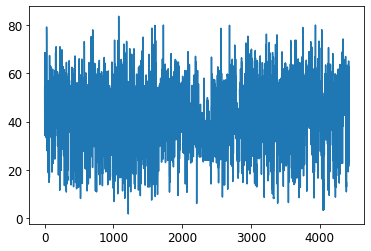

In [325]:
plt.plot(df_score['Health_Score'])

In [326]:
df1.sort_values(by = 'Orders Week 1', ascending = False)

,Customer Success Associate,Parent Restaurant name,Unique Location ID,Highest Product,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,...,Activation Date,Number of online delivery partners,Highest Product_num,Total_Value_Week1,Total_Value_Week2,Activation_Date_Diff,Total_Value_Week1_norm,Total_Value_Week2_norm,Activation_Date_Diff_norm,Highest Product_num_norm
3215,Drogo,Restaurant 1010,d1379952-3c8f-4b11-847a-10a0b66ca3fa,Premium,1.0,1.0,6938.0,6409.0,6907.0,3276.0,...,20105.0,4.0,3.0,159199.56,180734.90,3115.0,1.0,1.000000,0.652977,0.75
3876,Rupert,Restaurant 75,c1a2d438-cb15-4e0e-982a-45b04158f67e,Order Manager,1.0,1.0,2750.0,2382.0,2747.0,2368.0,...,19276.0,3.0,2.0,48664.26,55385.00,3944.0,1.0,1.000000,0.936687,0.50
1186,Alex,Restaurant 621,9b8b41be-6f1b-4c9e-bb95-88a579147c4f,POS Integration,1.0,1.0,1805.0,2260.0,1797.0,2237.0,...,20272.0,2.0,1.0,75958.60,65322.95,2948.0,1.0,1.000000,0.595825,0.25
4027,Rupert,Restaurant 335,a32a9970-6e9c-3686-b1ab-4d4122c99742,Premium,1.0,1.0,2048.0,1917.0,1903.0,1879.0,...,21343.0,1.0,3.0,51720.66,57180.16,1877.0,1.0,1.000000,0.229295,0.75
942,Alex,Restaurant 326,a41076d2-c8b8-36b3-8412-bdc4fa4e2212,Premium + POS,0.0,1.0,1771.0,1858.0,0.0,0.0,...,21350.0,0.0,4.0,35766.50,38324.44,1870.0,1.0,1.000000,0.226899,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,Dolly,Restaurant 1133,707ec890-bb11-48ec-aaad-17dac65b0423,POS Integration,0.0,0.0,0.0,0.0,0.0,0.0,...,21074.0,0.0,1.0,0.00,0.00,2146.0,0.0,0.000000,0.321355,0.25
3665,Dolly,Restaurant 1133,003c63c7-6971-44c0-b77f-606861eb8342,POS Integration,0.0,0.0,0.0,0.0,0.0,0.0,...,21074.0,0.0,1.0,0.00,0.00,2146.0,0.0,0.000000,0.321355,0.25
1835,Nicole,Restaurant 812,15398f1b-2845-4971-bc93-bc09da68127b,Premium,0.0,1.0,0.0,0.0,0.0,0.0,...,21071.0,0.0,3.0,0.00,0.00,2149.0,0.0,0.000000,0.322382,0.75
889,Alex,Restaurant 824,0d8530d7-7ad6-4172-a576-dcee4c497be1,POS Integration,0.0,1.0,0.0,0.0,0.0,0.0,...,21075.0,0.0,1.0,0.00,0.00,2145.0,0.0,0.000000,0.321013,0.25


In [327]:
df_score.sort_values(by = 'Health_Score', ascending=False)

,Customer Success Associate,Parent Restaurant name,Unique Location ID,Highest Product,# Printers,# Tablets,Orders Week 2,Orders Week 1,Printed Orders Week 2,Printed Orders Week 1,...,Number of online delivery partners,Highest Product_num,Total_Value_Week1,Total_Value_Week2,Activation_Date_Diff,Total_Value_Week1_norm,Total_Value_Week2_norm,Activation_Date_Diff_norm,Highest Product_num_norm,Health_Score
1076,Alex,Restaurant 122,174075b4-e0a1-427e-ad70-646691f05682,Premium + POS,1.0,1.0,1250.0,1232.0,1249.0,1232.0,...,2.0,4.0,63990.08,65562.50,2206.0,1.000000,1.000000,0.341889,1.00,83.664906
1725,Nicole,Restaurant 541,549cd67d-9d40-49b0-be5f-18707b87fa81,Order Manager,1.0,1.0,797.0,813.0,794.0,811.0,...,2.0,2.0,36284.19,38742.17,3063.0,1.000000,1.000000,0.635181,0.50,79.995309
3935,Rupert,Restaurant 707,34ad0593-11db-4153-b177-1764d3de8724,Order Manager,1.0,1.0,1213.0,1408.0,1211.0,1403.0,...,2.0,2.0,36847.36,32581.18,3002.0,1.000000,1.000000,0.614305,0.50,79.989688
2686,Nicole,Restaurant 541,c8887e18-c6a9-4ba9-b421-840b30baec4a,Order Manager,1.0,1.0,393.0,405.0,390.0,405.0,...,2.0,2.0,28135.35,28669.35,3072.0,0.992706,0.993851,0.638261,0.50,79.900866
1603,Alex,Restaurant 1132,2c1430a1-b499-48a0-99c3-3d8166944c88,Premium + POS,1.0,1.0,506.0,593.0,504.0,592.0,...,2.0,4.0,26097.93,22754.82,2143.0,0.920819,0.788818,0.320329,1.00,79.848148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,Nicole,Restaurant 51,f0005b8e-e915-3f1a-ab01-7199eb588cef,Unknown,0.0,0.0,9.0,6.0,0.0,0.0,...,1.0,0.0,173.22,302.85,1988.0,0.006112,0.010499,0.267283,0.00,6.044043
4053,Rupert,Restaurant 17,c860b758-7f01-4773-a518-959a1679df9c,Unknown,1.0,1.0,5.0,0.0,0.0,0.0,...,1.0,0.0,0.00,153.55,1206.0,0.000000,0.005323,-0.000342,0.00,3.314826
4051,Rupert,Restaurant 17,6ae7565a-c063-4ff3-ba2b-862cd7c58e5c,Unknown,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.00,27.37,1206.0,0.000000,0.000949,-0.000342,0.00,3.260149
4048,Rupert,Restaurant 17,7baec01d-8e5a-40f4-b260-acb62e218992,Unknown,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.00,20.18,1206.0,0.000000,0.000700,-0.000342,0.00,3.257033


In [341]:
list(df_score['Payment Status'].unique()) + ['s']


['Active', 'Unknown', 'Past_Due', 'Canceled', 'Paused', 'Pending', 's']

In [332]:
df_score.to_excel('Data_Score.xlsx')